## Exercises
Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [33]:
import pandas as pd
import numpy as np
import env
import wrangle
import wrangle_telco
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [47]:
# data wrangling
df = wrangle_telco.get_telco_data()

In [48]:
df

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4,3,1,9919-FZDED,Male,1,Yes,No,72,Yes,...,No,Yes,Yes,Yes,84.10,5981.65,No,DSL,Two year,Credit card (automatic)
7039,3,3,1,9926-PJHDQ,Female,0,Yes,Yes,72,Yes,...,No,Yes,Yes,Yes,76.80,5468.45,No,DSL,Two year,Bank transfer (automatic)
7040,2,3,1,9928-BZVLZ,Female,0,No,No,12,No,...,Yes,No,Yes,No,49.85,552.1,No,DSL,Two year,Mailed check
7041,2,3,1,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [50]:
#splits the data into train, validate and test
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
train, validate = train_test_split(train, test_size = 0.25, random_state = 123)

In [51]:
#define
scaler = sklearn.preprocessing.MinMaxScaler()

#fit
scaler.fit(train[['monthly_charges']])

#transform
scaled = scaler.transform(train[['monthly_charges']])


#both fit and transform
scaled = scaler.fit_transform(train[['monthly_charges']])
scaled

array([[0.02693267],
       [0.01147132],
       [0.80299252],
       ...,
       [0.61246883],
       [0.66733167],
       [0.56658354]])

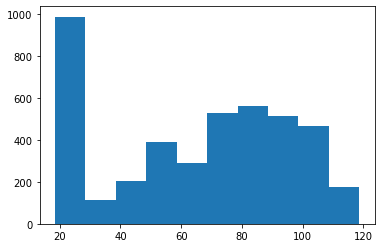

In [53]:
#distribution of monthly charges (unscaled)
plt.hist(train.monthly_charges);

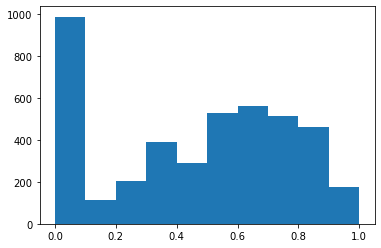

In [54]:
#distribution of monthly charges (scaled)
plt.hist(scaled);

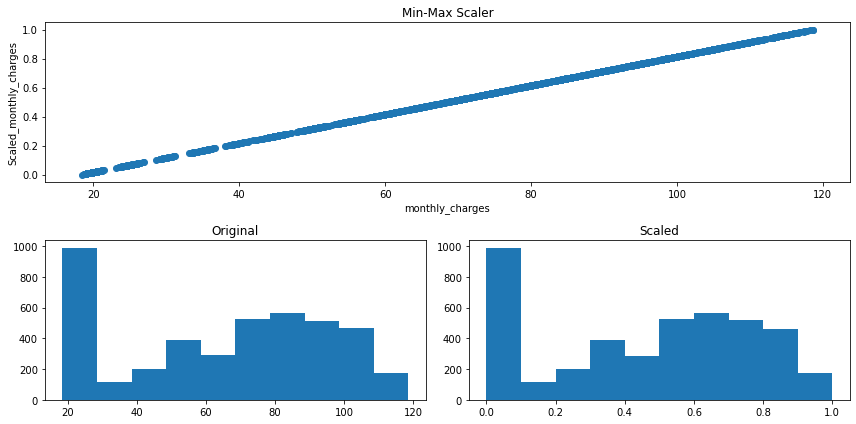

In [55]:
#Ravinders way to show different kinds of plots put togehter
fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [56]:
train

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
440,4,1,3,8246-SHFGA,Male,0,No,No,17,Yes,...,No internet service,No internet service,No internet service,No,21.10,385.55,No,None,Month-to-month,Credit card (automatic)
67,2,1,3,1345-GKDZZ,Male,0,No,Yes,6,Yes,...,No internet service,No internet service,No internet service,No,19.55,128.6,No,None,Month-to-month,Mailed check
600,1,1,2,0354-WYROK,Female,1,Yes,Yes,31,Yes,...,Yes,Yes,Yes,Yes,98.90,2911.3,Yes,Fiber optic,Month-to-month,Electronic check
4883,1,2,1,1921-KYSAY,Female,0,No,No,41,Yes,...,Yes,No,Yes,Yes,68.60,2877.05,No,DSL,One year,Electronic check
1258,1,1,2,3398-ZOUAA,Male,1,Yes,No,21,Yes,...,No,No,No,Yes,69.10,1474.75,Yes,Fiber optic,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,1,2,5857-TYBCJ,Male,1,Yes,No,44,Yes,...,No,Yes,No,Yes,89.20,4040.2,No,Fiber optic,Month-to-month,Electronic check
817,1,1,2,1415-YFWLT,Female,1,No,No,1,Yes,...,No,Yes,Yes,Yes,89.30,89.3,Yes,Fiber optic,Month-to-month,Electronic check
901,3,1,2,1867-TJHTS,Female,0,No,No,58,Yes,...,No,No,No,Yes,79.80,4526.85,No,Fiber optic,Month-to-month,Bank transfer (automatic)
1987,1,1,2,6719-OXYBR,Male,0,No,No,15,Yes,...,No,Yes,No,No,85.30,1219.85,No,Fiber optic,Month-to-month,Electronic check


In [57]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled = scaler.fit_transform(train[['monthly_charges', 'tenure']])
scaled

array([[0.02693267, 0.23611111],
       [0.01147132, 0.08333333],
       [0.80299252, 0.43055556],
       ...,
       [0.61246883, 0.80555556],
       [0.66733167, 0.20833333],
       [0.56658354, 0.70833333]])

In [59]:
scaled_df = pd.DataFrame(scaled, index = train.index, columns = ['monthly_charges', 'tenure'])
scaled_df.head()

,monthly_charges,tenure
440,0.026933,0.236111
67,0.011471,0.083333
600,0.802993,0.430556
4883,0.500748,0.569444
1258,0.505736,0.291667


In [60]:
scaler.inverse_transform(scaled_df)

array([[21.1 , 17.  ],
       [19.55,  6.  ],
       [98.9 , 31.  ],
       ...,
       [79.8 , 58.  ],
       [85.3 , 15.  ],
       [75.2 , 51.  ]])

In [61]:
# we can change numpy 2d array to a dataframe
unscaled_df = pd.DataFrame(scaler.inverse_transform(scaled), index = train.index, columns = ['monthly_charges', 'tenure'])
unscaled_df.head()

,monthly_charges,tenure
440,21.10,17.0
67,19.55,6.0
600,98.90,31.0
4883,68.60,41.0
1258,69.10,21.0


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [64]:
def visualize_scaled_data(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout();

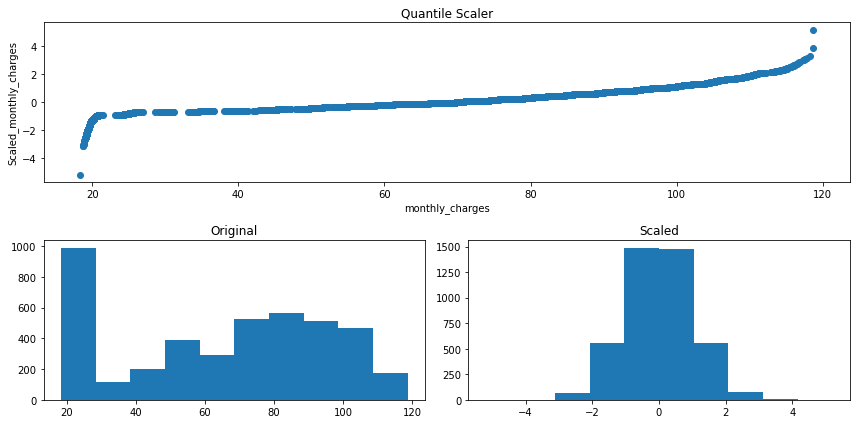

In [66]:
visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'monthly_charges')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

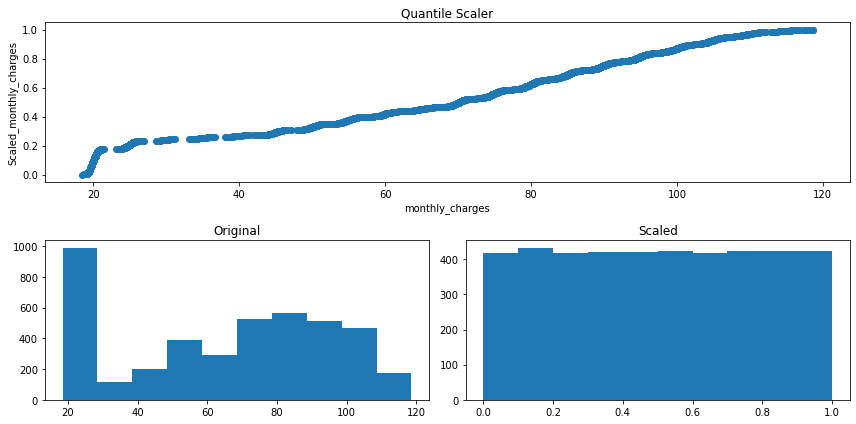

In [68]:
visualize_scaled_data(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'monthly_charges')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [69]:
def Standard_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs
    """

    scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [70]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [71]:
X_train = train[['monthly_charges', 'tenure']]
X_validate = test[['monthly_charges', 'tenure']]
X_test = test[['monthly_charges', 'tenure']]

In [72]:
# Use the Standard_Scaler Function defined above
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Standard_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure
440,-1.434940,-0.623343
67,-1.486169,-1.073276
600,1.136412,-0.050700
4883,0.134972,0.358330
1258,0.151498,-0.459731
